<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/KerasClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Tumour Classification : Malignent/Benign Problem

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df1 = df.copy()

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
#No Null values. 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


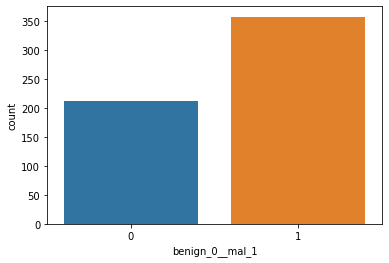

In [8]:
sns.countplot(x='benign_0__mal_1',data = df) #counts the number of 0's and 1's in this categorical column.

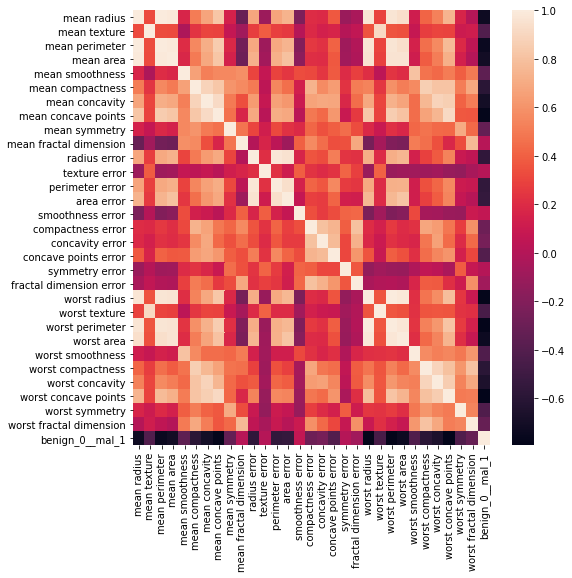

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

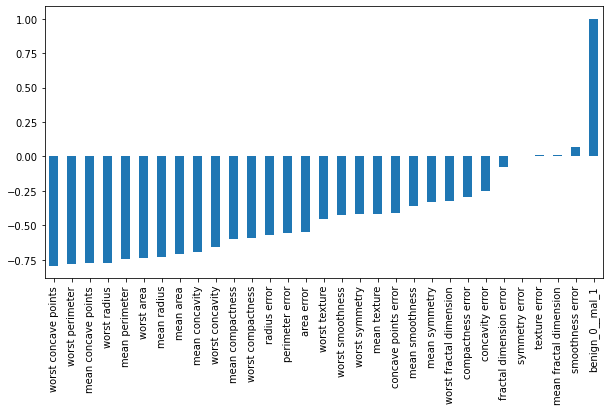

In [10]:
plt.figure(figsize=(10,5))

df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values

In [12]:
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

#Part 2 : Dealing with overfitting (early stop | layer drop) 
## ANd finally model evaluation

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
X_train.shape

(426, 30)

In [21]:
#30 Features. 
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASS. SO FINAL OUTPUT SHOULD BE 0/1
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6805 - val_loss: 0.6489
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6357 - val_loss: 0.6117
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.5663
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5454 - val_loss: 0.5152
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4926 - val_loss: 0.4571
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4379 - val_loss: 0.4008
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3860 - val_loss: 0.3488
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3402 - val_loss: 0.3060
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3004 - val_loss: 0.2656
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2649 - val_loss: 0.2350
Epoch 11

In [24]:
loss = pd.DataFrame(model.history.history)

In [25]:
loss.head()

,loss,val_loss
0,0.680457,0.648884
1,0.635735,0.611717
2,0.593107,0.566347
3,0.545353,0.515194
4,0.492626,0.457080


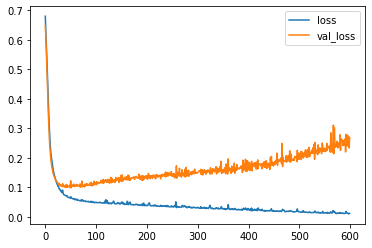

In [26]:
loss.plot()

In [28]:
#This is happening because we've used 600 epochs and that's a lot : OVERFITTING

#Call-backs and Early stopping (to avoid this error)

In [42]:
#30 Features. 
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

#BINARY CLASS. SO FINAL OUTPUT SHOULD BE 0/1
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# help(EarlyStopping)
#  Assuming the goal of a training is to minimize the loss. With this, the
#  |  metric to be monitored would be 'loss', and mode would be 'min'. A
#  |  `model.fit()` training loop will check at end of every epoch whether
#  |  the loss is no longer decreasing, considering the `min_delta` and
#  |  `patience` if applicable. Once it's found no longer decreasing,
#  |  `model.stop_training` is marked True and the training terminates.
#  |  We'll pick the metric as validation loss.

In [44]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [45]:
#note if our metric was accuracy , we'd want to maximize it. 
#if our metric was loss , we'd want to minimize it. 

# mode = auto, automoatically picks the mode based on the string. 

#patience = 25 means that we'll be waiting 25 epochs after the loss minimization just to make sure. 
# model.compile(loss='binary_crossentropy',optimizer='adam')

In [46]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6827 - val_loss: 0.6598
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6501 - val_loss: 0.6294
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6164 - val_loss: 0.5911
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5782 - val_loss: 0.5492
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5354 - val_loss: 0.5054
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4882 - val_loss: 0.4514
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4381 - val_loss: 0.4012
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3964 - val_loss: 0.3562
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3597 - val_loss: 0.3215
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3197 - val_loss: 0.2880
Epoch 11/

In [47]:
#SO basically what early_stop allows us is that we can pick any arbitrarily large number of epochs. 
#and, then indicate that we want the iteratons to stop early, based on when the loss no longer minimizes further. 

In [48]:
loss_after_early_stop = pd.DataFrame(model.history.history)

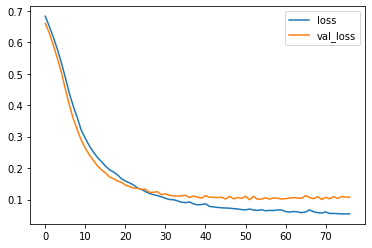

In [49]:
loss_after_early_stop.plot()

#Another method to Prevent OVERFITTING - DropOut Layers

## -> Turning OFF a % of neurons randomly

In [50]:
from tensorflow.keras.layers import Dropout

In [52]:
#re-make the model and compile it again. 
#30 Features. 
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASS. SO FINAL OUTPUT SHOULD BE 0/1
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [53]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7381 - val_loss: 0.7038
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7272 - val_loss: 0.6907
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7173 - val_loss: 0.6780
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6961 - val_loss: 0.6656
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6562 - val_loss: 0.6539
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6704 - val_loss: 0.6409
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6502 - val_loss: 0.6258
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6198 - val_loss: 0.6052
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6180 - val_loss: 0.5869
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6000 - val_loss: 0.5660
Epoch 11/

In [54]:
model_loss_after_ES_DO = pd.DataFrame(model.history.history)

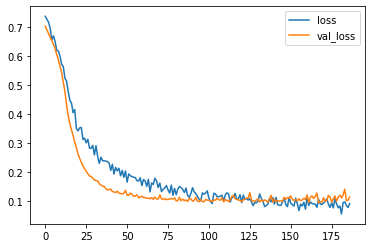

In [55]:
model_loss_after_ES_DO.plot()

In [56]:
yp = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
print("\n This is the Classification Report \n ")
print(classification_report(y_test,yp))

print("\n ************** \n")

print("\n This is the Confusion Matrix \n ")
print(confusion_matrix(y_test,yp))


 This is the Classification Report 
 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143


 ************** 


 This is the Confusion Matrix 
 
[[54  1]
 [ 4 84]]
